# Statistical methods for text classification

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use("dark_background")

bbc_df = pd.read_csv("_data/2_Medium_BBC_Dataset/bbc_dataset_preprocessed.csv")
bbc_df.head()

,file_name,category,text,cleaned_text,normalized_text,lemmatized_normalized_text
0,001.txt,business,Ad sales boost Time Warner profit\n\nQuarterly...,ad sales boost time warner profit quarterly pr...,ad sale boost time warner profit quarterli pro...,ad sale boost time warner profit quarterly pro...
1,002.txt,business,Dollar gains on Greenspan speech\n\nThe dollar...,dollar gains on greenspan speech the dollar ha...,dollar gain greenspan speech dollar hit highes...,dollar gain greenspan speech dollar hit highes...
2,003.txt,business,Yukos unit buyer faces loan claim\n\nThe owner...,yukos unit buyer faces loan claim the owners o...,yuko unit buyer face loan claim owner embattl ...,yukos unit buyer face loan claim owner embattl...
3,004.txt,business,High fuel prices hit BA's profits\n\nBritish A...,high fuel prices hit ba s profits british airw...,high fuel price hit ba profit british airway b...,high fuel price hit ba profit british airway b...
4,005.txt,business,Pernod takeover talk lifts Domecq\n\nShares in...,pernod takeover talk lifts domecq shares in uk...,pernod takeov talk lift domecq share uk drink ...,pernod takeover talk lift domecq share uk drin...


# Linear SVM

Classification Report:
               precision    recall  f1-score   support

     business       1.00      0.95      0.97       102
entertainment       0.97      1.00      0.99        77
     politics       0.99      0.98      0.98        84
        sport       0.99      1.00      1.00       102
         tech       0.96      1.00      0.98        80

     accuracy                           0.98       445
    macro avg       0.98      0.99      0.98       445
 weighted avg       0.98      0.98      0.98       445



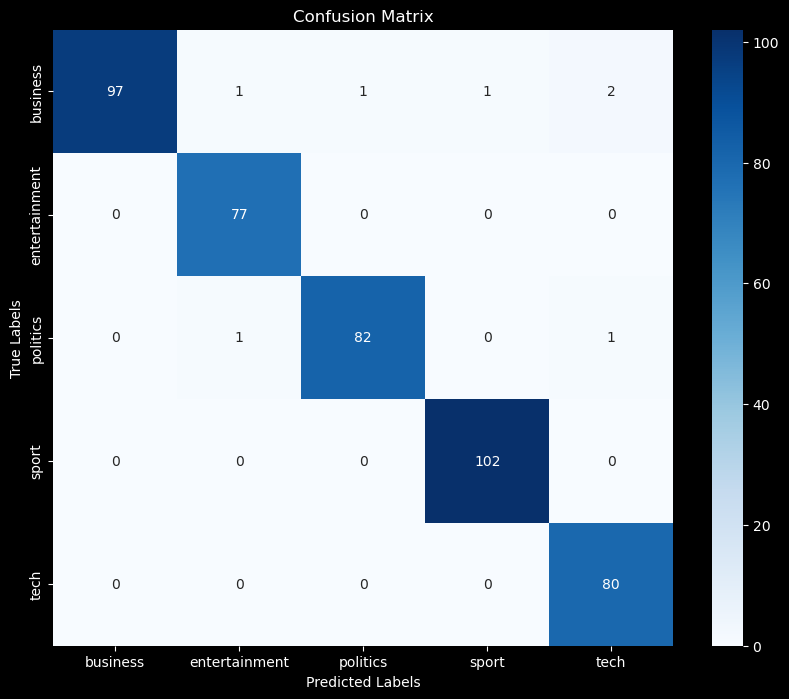

Top 20 features for business: firm, bank, bn, company, share, economic, economy, price, investment, business, profit, market, food, airline, saudi, deficit, oil, rate, financial, ministry
Top 20 features for entertainment: film, show, singer, band, star, music, album, ticket, chart, book, ballet, actor, song, oscar, artist, festival, gallery, cd, hendrix, jackson
Top 20 features for politics: party, mp, mr, blair, secretary, minister, straw, lord, committee, labour, tory, council, police, election, government, brown, safety, howard, britain, health
Top 20 features for sport: match, club, season, coach, player, win, cup, champion, athletics, rugby, olympic, liverpool, injury, race, team, arsenal, athlete, goal, seed, tennis
Top 20 features for tech: technology, computer, game, online, software, user, digital, ink, blog, net, pc, mobile, people, robot, apple, site, speed, network, website, data


In [19]:
# Split the data
X = bbc_df['lemmatized_normalized_text']
y = bbc_df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train an SVM classifier
svm_classifier = LinearSVC(dual='auto')
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
categories = sorted(bbc_df['category'].unique())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Check most important features for each category
def get_top_features(vectorizer, classifier, category_names, n_top=20):
    feature_names = vectorizer.get_feature_names_out()

    # For OneVsRestClassifier, access estimators_ attribute
    if hasattr(classifier, 'estimators_'):
        estimators = classifier.estimators_
    else:
        # If it's a direct LinearSVC
        estimators = [classifier]

    for i, category in enumerate(category_names):
        if i < len(estimators):
            estimator = estimators[i]
            if hasattr(estimator, 'coef_'):
                top_indices = np.argsort(estimator.coef_[0])[-n_top:]
                top_features = [feature_names[j] for j in top_indices]
                print(f"Top {n_top} features for {category}: {', '.join(top_features[::-1])}")

from sklearn.multiclass import OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(LinearSVC(dual='auto'))
ovr_classifier.fit(X_train_tfidf, y_train)
get_top_features(tfidf_vectorizer, ovr_classifier, categories)

# Multinomial Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Naive Bayes Classification Report:
               precision    recall  f1-score   support

     business       0.99      0.96      0.98       102
entertainment       1.00      1.00      1.00        77
     politics       0.98      0.98      0.98        84
        sport       1.00      1.00      1.00       102
         tech       0.96      1.00      0.98        80

     accuracy                           0.99       445
    macro avg       0.99      0.99      0.99       445
 weighted avg       0.99      0.99      0.99       445



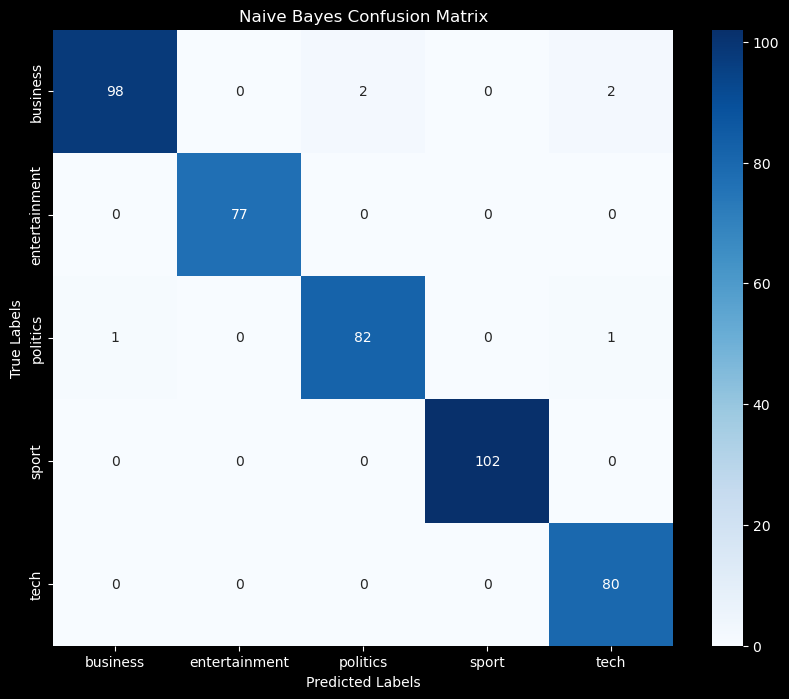


Comparison between SVM and Naive Bayes:
SVM Accuracy: 0.9843
Naive Bayes Accuracy: 0.9865


In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Create and plot confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
categories = sorted(bbc_df['category'].unique())

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

print("\nComparison between SVM and Naive Bayes:")
from sklearn.metrics import accuracy_score
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Random Forest Classification Report:
               precision    recall  f1-score   support

     business       0.94      0.97      0.96       102
entertainment       1.00      0.99      0.99        77
     politics       0.99      0.93      0.96        84
        sport       0.98      1.00      0.99       102
         tech       0.96      0.97      0.97        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



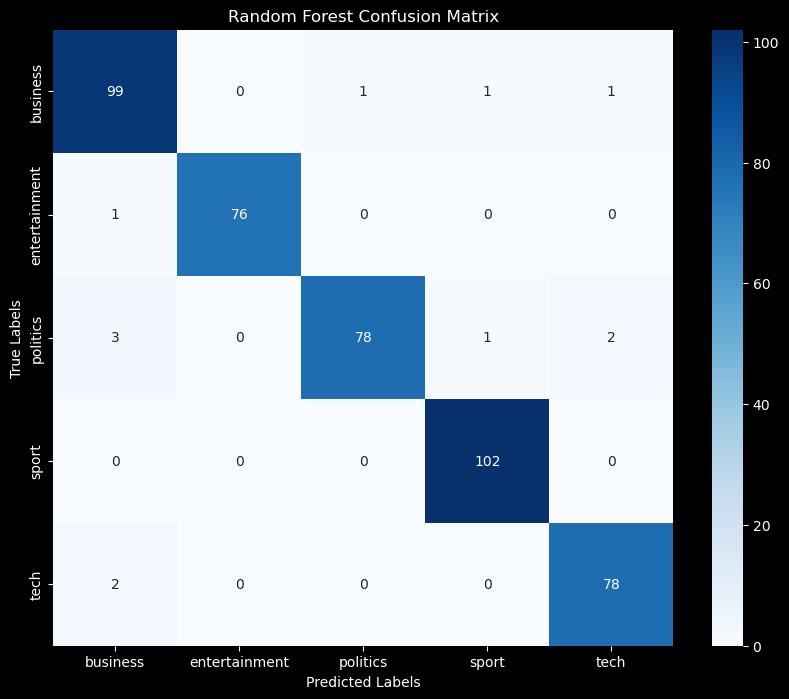


Model Comparison:
SVM Accuracy: 0.9843
Naive Bayes Accuracy: 0.9865
Random Forest Accuracy: 0.9730


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Compare all three models
from sklearn.metrics import accuracy_score
print("\nModel Comparison:")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# Feature importance for random forest

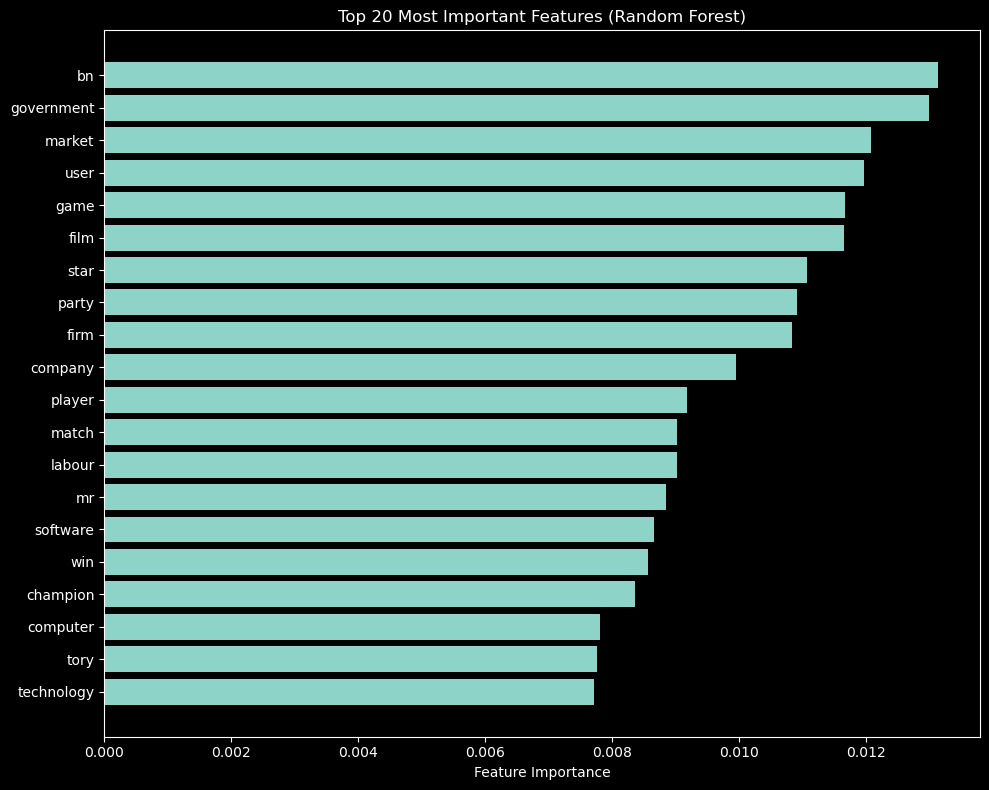

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Plot top 20 most important features overall
feature_importances = rf_classifier.feature_importances_
sorted_idx = np.argsort(feature_importances)[-20:]

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features (Random Forest)')
plt.tight_layout()
plt.show()

# Coefficients from SVM Model

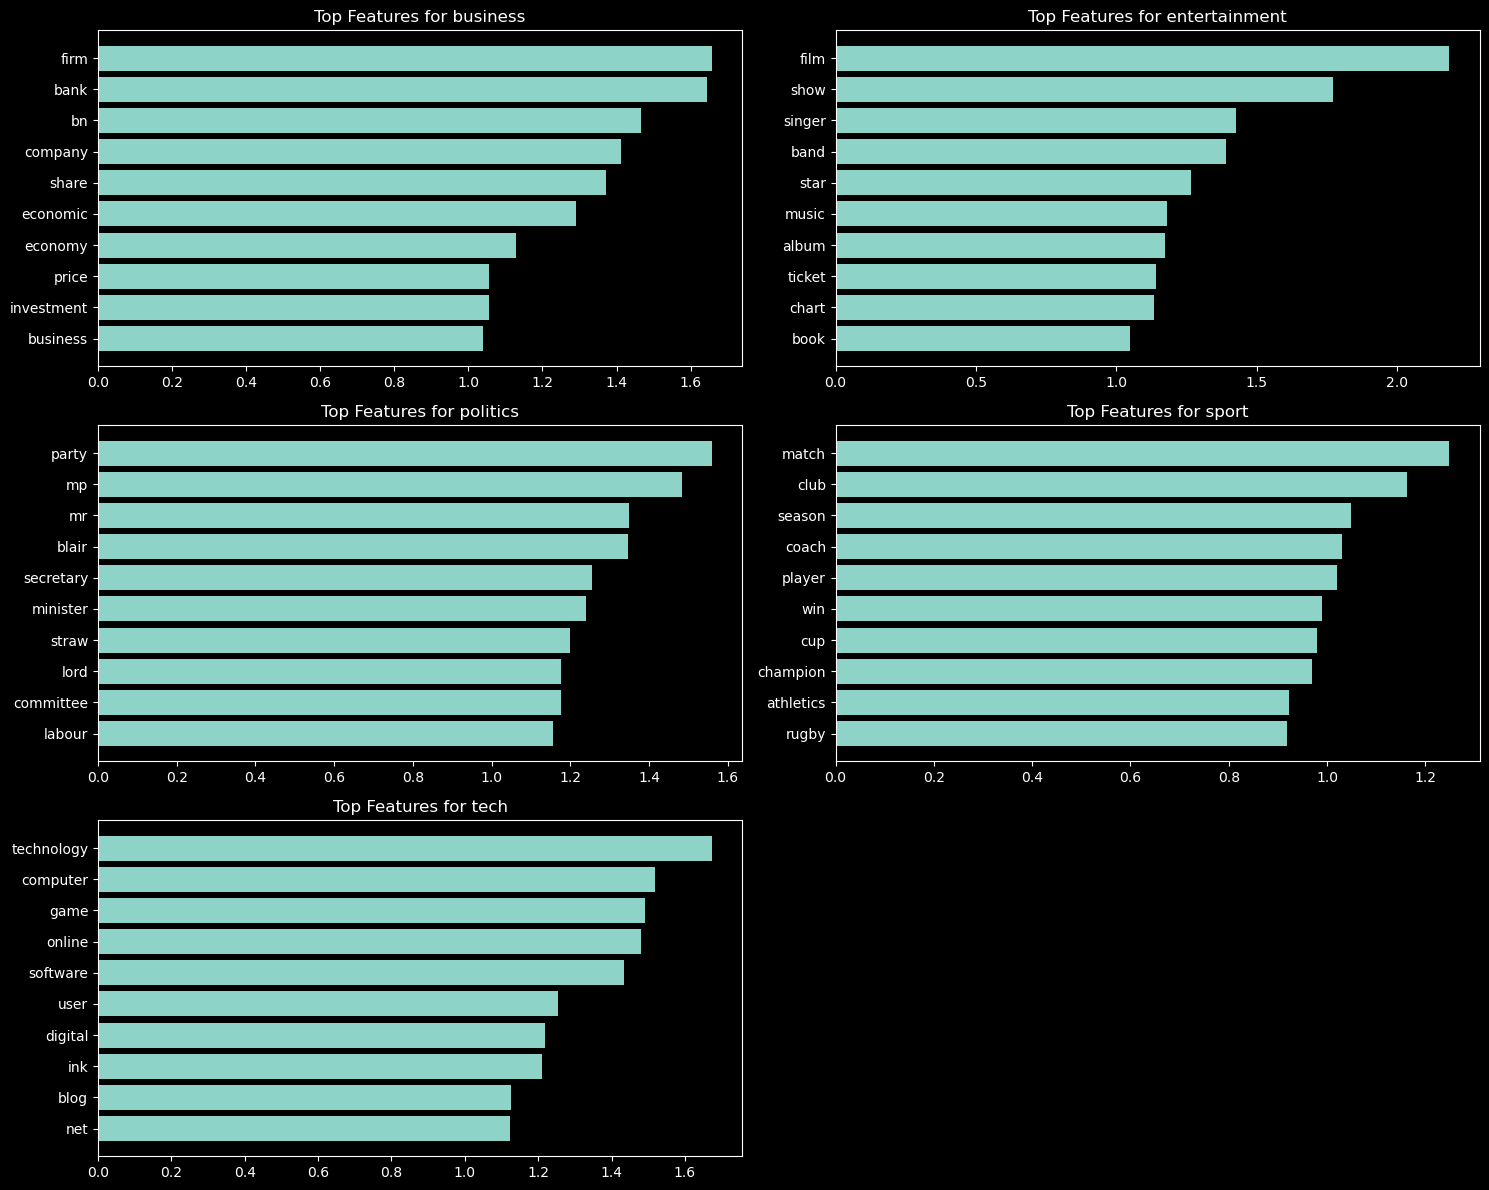

In [ ]:
# Get the top features for each category from SVM
def plot_top_features_per_category(classifier, feature_names, categories, top_n=10):
    plt.figure(figsize=(15, 12))

    for i, category in enumerate(categories):
        coefficients = classifier.coef_[i]
        top_indices = np.argsort(coefficients)[-top_n:]

        plt.subplot(3, 2, i+1)
        plt.barh(range(top_n), coefficients[top_indices])
        plt.yticks(range(top_n), [feature_names[j] for j in top_indices])
        plt.title(f'Top Features for {category}')

    plt.tight_layout()
    plt.show()

# Make sure categories are in the same order as classifier's classes
categories = svm_classifier.classes_
plot_top_features_per_category(svm_classifier, feature_names, categories)

# Conditional Probabilities from Naive Bayes

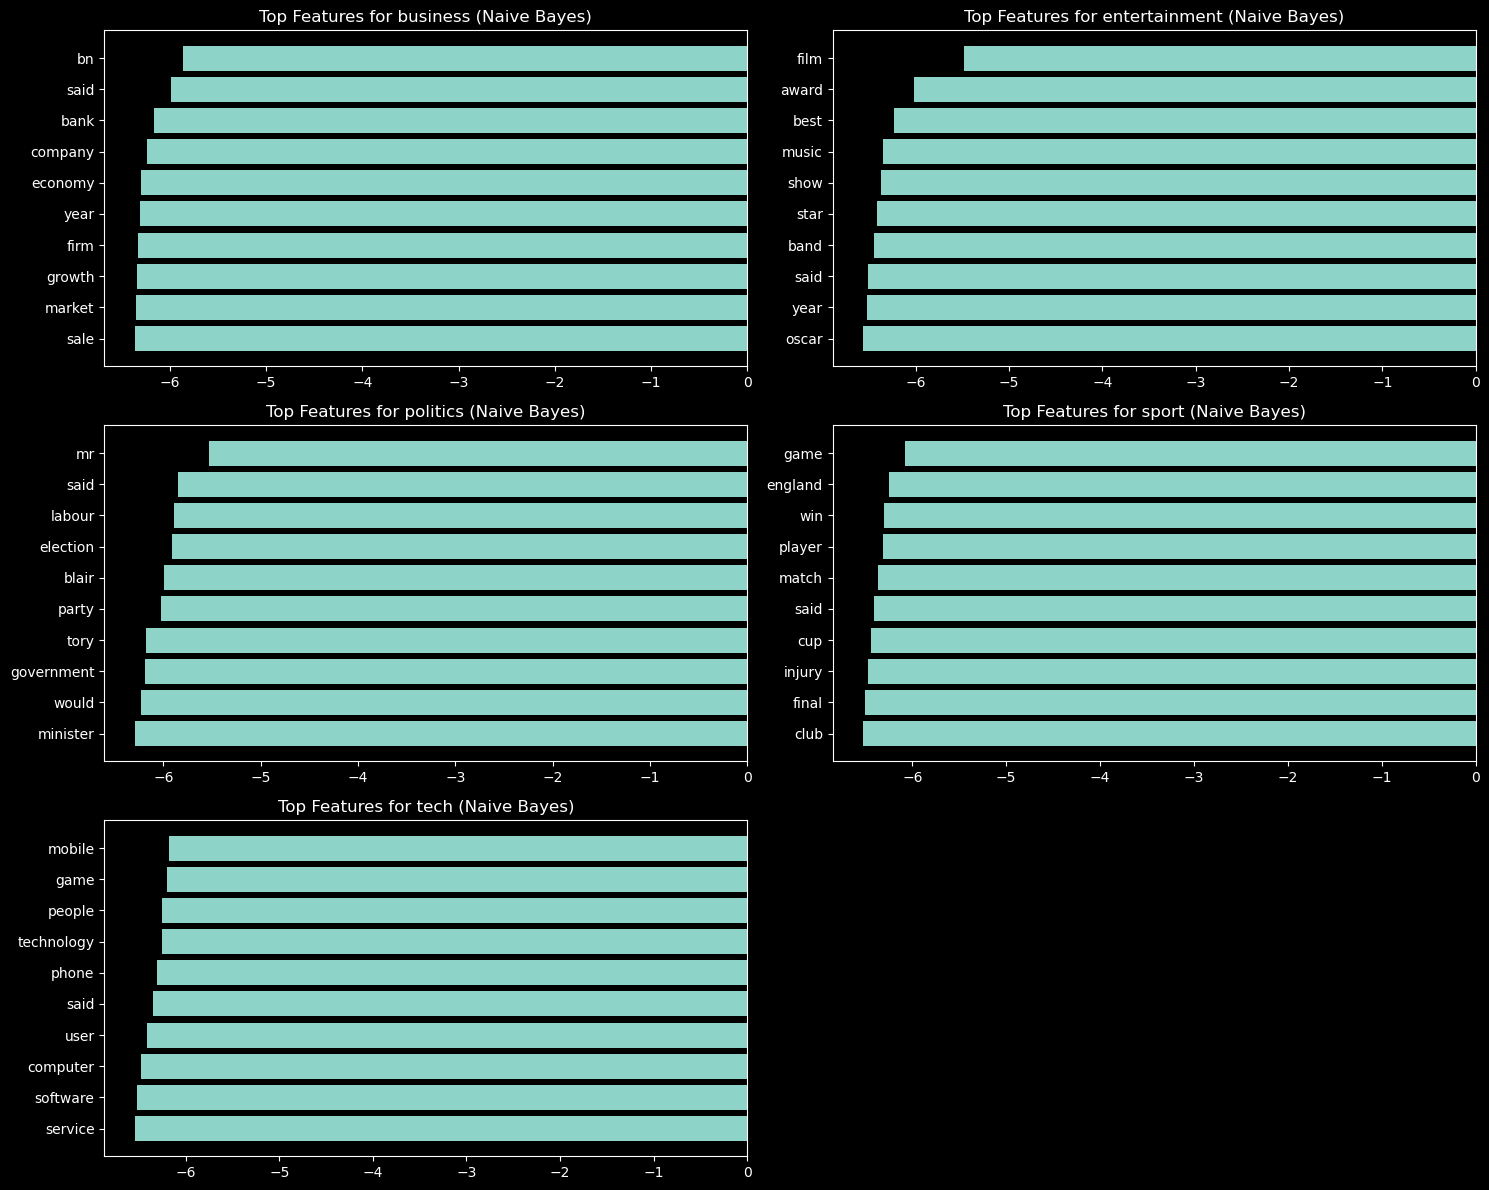

In [ ]:
def plot_naive_bayes_features(nb_classifier, feature_names, categories, top_n=10):
    plt.figure(figsize=(15, 12))
    feature_log_probs = nb_classifier.feature_log_prob_

    for i, category in enumerate(categories):
        # Get the log probabilities for this category
        log_probs = feature_log_probs[i]
        # Find indices of top features for this category
        top_indices = np.argsort(log_probs)[-top_n:]

        plt.subplot(3, 2, i+1)
        plt.barh(range(top_n), log_probs[top_indices])
        plt.yticks(range(top_n), [feature_names[j] for j in top_indices])
        plt.title(f'Top Features for {category} (Naive Bayes)')

    plt.tight_layout()
    plt.show()

# Make sure categories are in the order of classifier's classes
categories = nb_classifier.classes_
plot_naive_bayes_features(nb_classifier, feature_names, categories)

# Word Clouds for Each Category

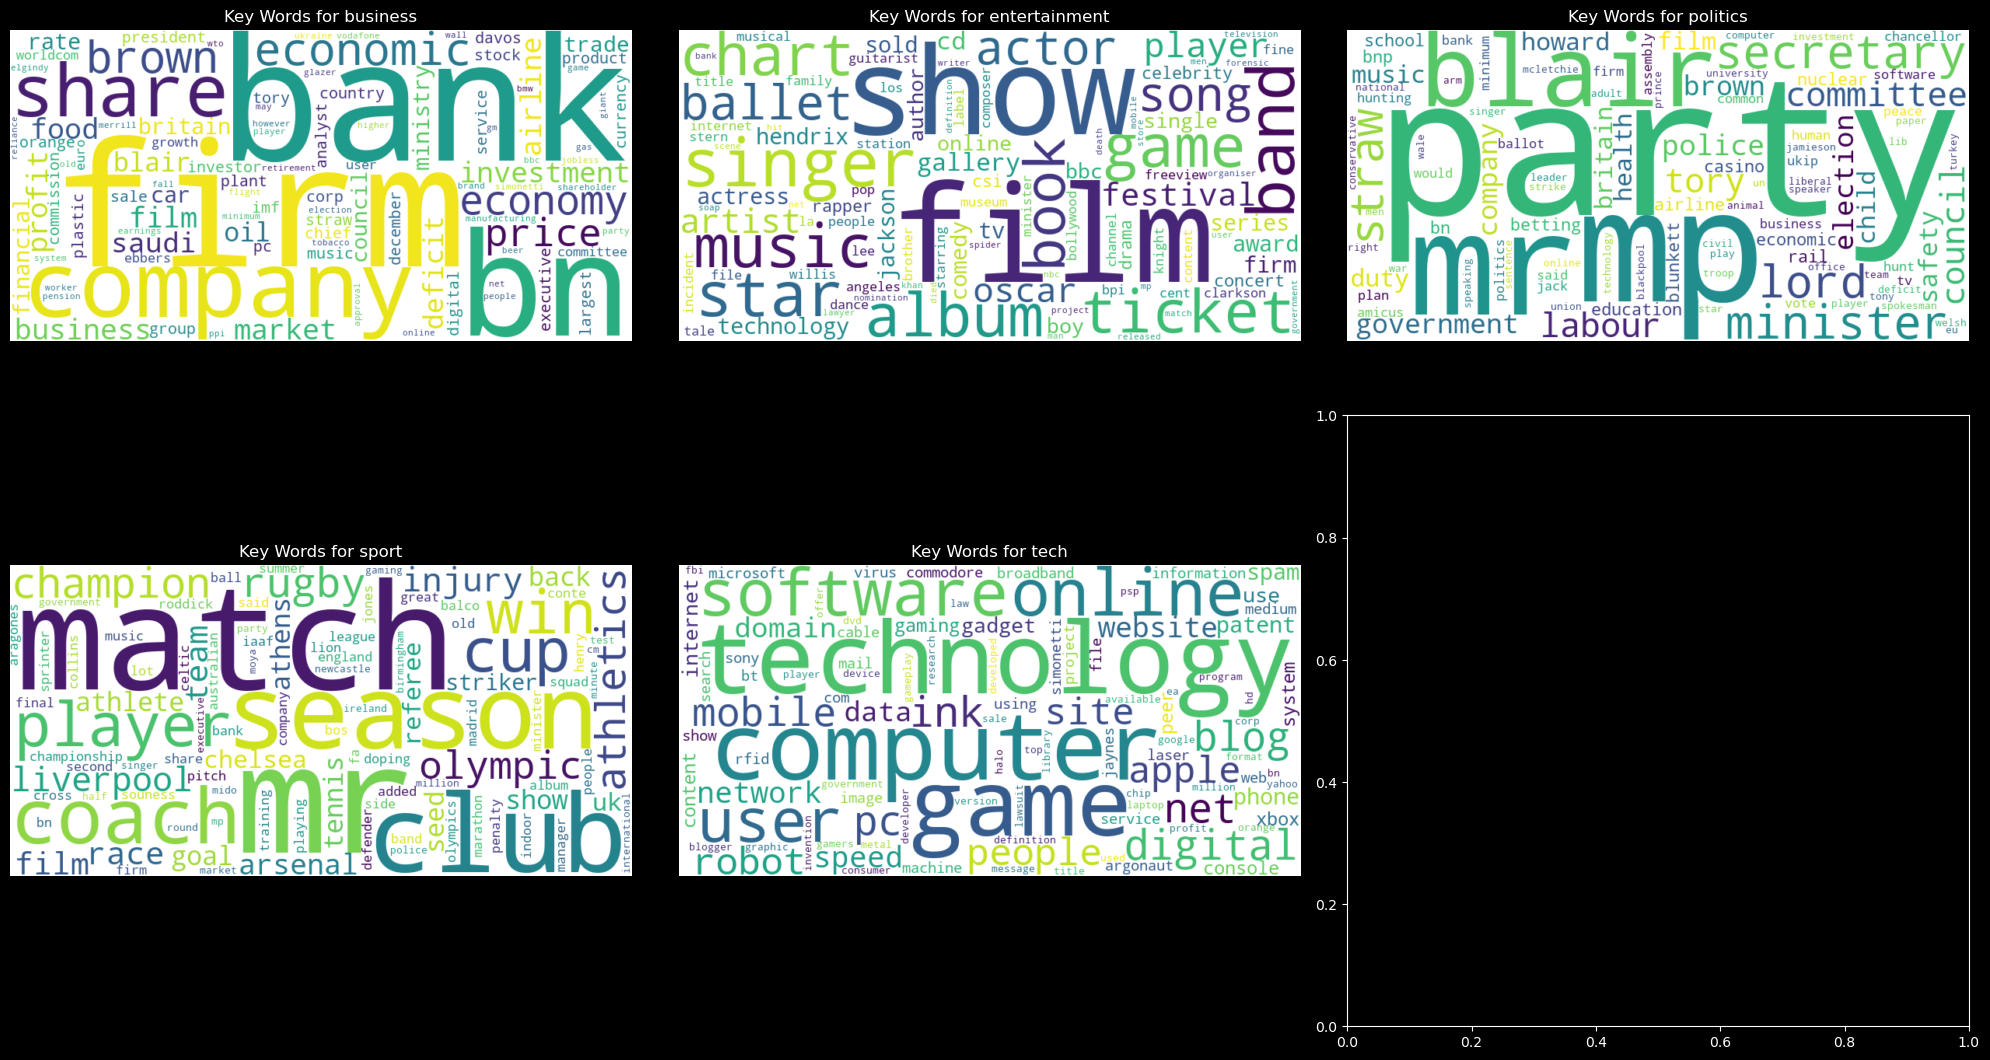

In [ ]:
from wordcloud import WordCloud

def plot_category_wordclouds(vectorizer, classifier, categories):
    feature_names = vectorizer.get_feature_names_out()

    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()

    for i, category in enumerate(categories):
        if i < len(classifier.classes_):
            # Get the feature weights for this category
            if hasattr(classifier, 'coef_'):
                weights = classifier.coef_[i]
            elif hasattr(classifier, 'feature_importances_'):
                weights = classifier.feature_importances_
            else:
                continue

            # Create a dictionary of word:weight
            word_weights = {feature_names[j]: abs(weights[j]) for j in range(len(feature_names))}

            # Generate a word cloud
            wordcloud = WordCloud(width=800, height=400,
                                 background_color='white',
                                 max_words=100).generate_from_frequencies(word_weights)

            axes[i].imshow(wordcloud, interpolation='bilinear')
            axes[i].set_title(f'Key Words for {category}')
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# For SVM
plot_category_wordclouds(tfidf_vectorizer, svm_classifier, svm_classifier.classes_)

# T-SNE Visualization of Document Vectors

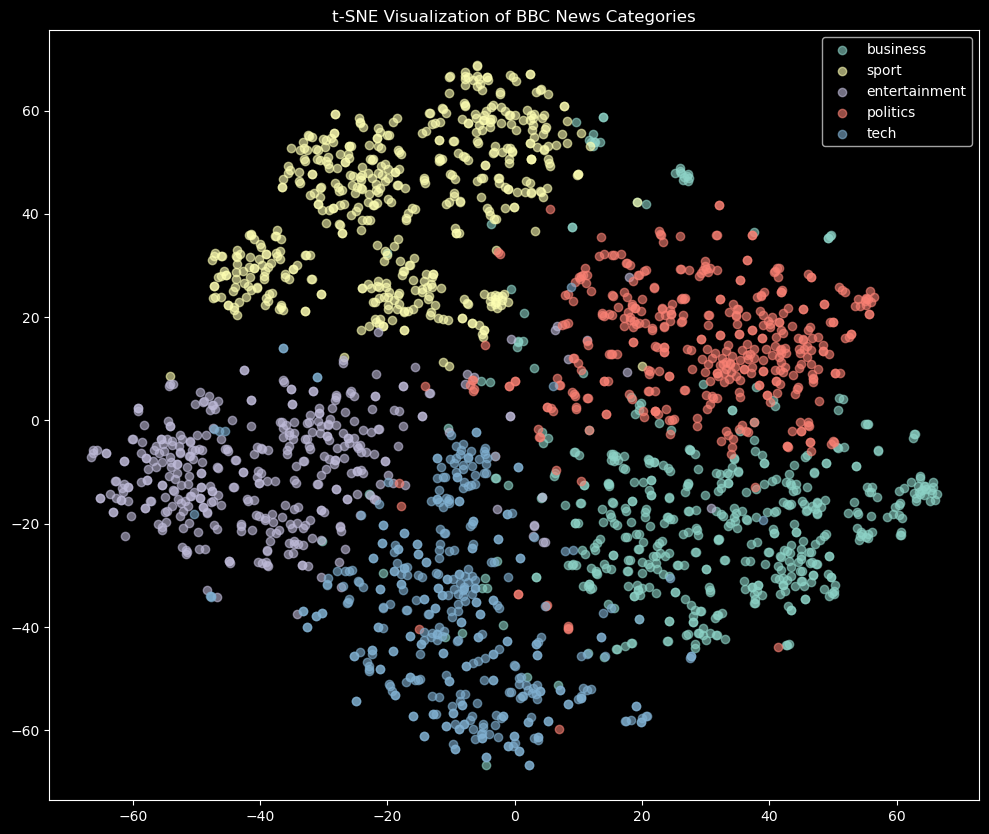

In [28]:
from sklearn.manifold import TSNE
import pandas as pd

# Create a t-SNE model to visualize the data in 2D
tsne = TSNE(n_components=2, random_state=42)

# Combine train and test data for visualization
X_combined = np.vstack([X_train_tfidf.toarray(), X_test_tfidf.toarray()])
y_combined = np.concatenate([y_train, y_test])

# Reduce the dimensionality
X_tsne = tsne.fit_transform(X_combined)

# Create a dataframe for plotting
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['category'] = y_combined

# Plot
plt.figure(figsize=(12, 10))
for category in tsne_df['category'].unique():
    subset = tsne_df[tsne_df['category'] == category]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=category, alpha=0.6)

plt.legend()
plt.title('t-SNE Visualization of BBC News Categories')
plt.show()

# Plotwist: This dataset was very easy:( thats why we have such good results
TODO investigate possible data leak